In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [ ]:
data=pd.read_csv('/content/Admission_Predict (1) - Admission_Predict (1).csv.csv')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,0.81750
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,0.38674
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,0.00000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,1.00000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,1.00000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,1.00000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Admitted           400 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.4 KB


In [ ]:
data.shape

In [ ]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


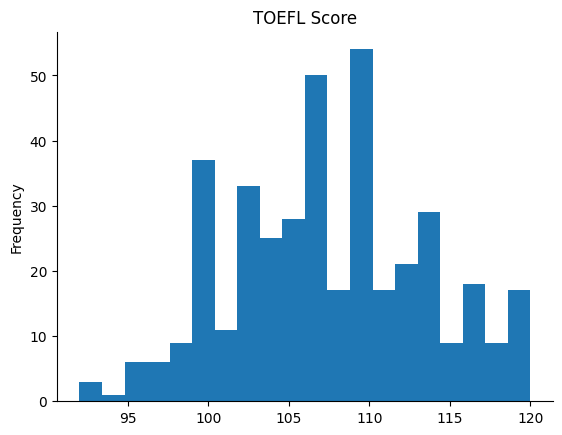

In [ ]:
from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

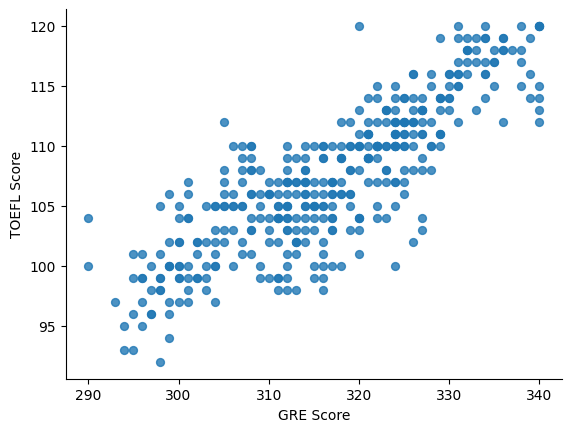

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_encoder = LabelEncoder()
data['Research'] = label_encoder.fit_transform(data['Research'])

In [ ]:
x = data[['GRE Score','CGPA']]
y = data['Admitted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


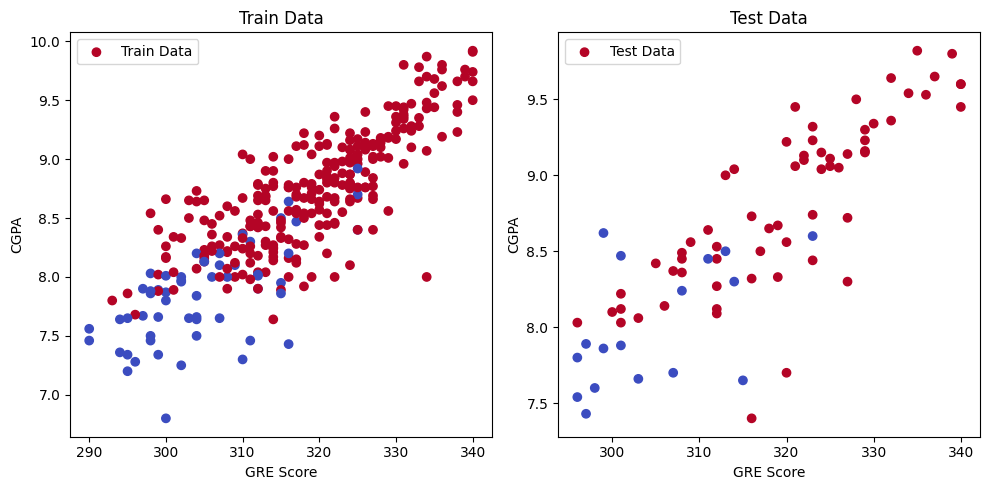

In [26]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train['GRE Score'], x_train['CGPA'], c=y_train, cmap='coolwarm', marker='o', label='Train Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['GRE Score'], x_test['CGPA'], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Test Data')
plt.legend()

plt.tight_layout()
plt.show()

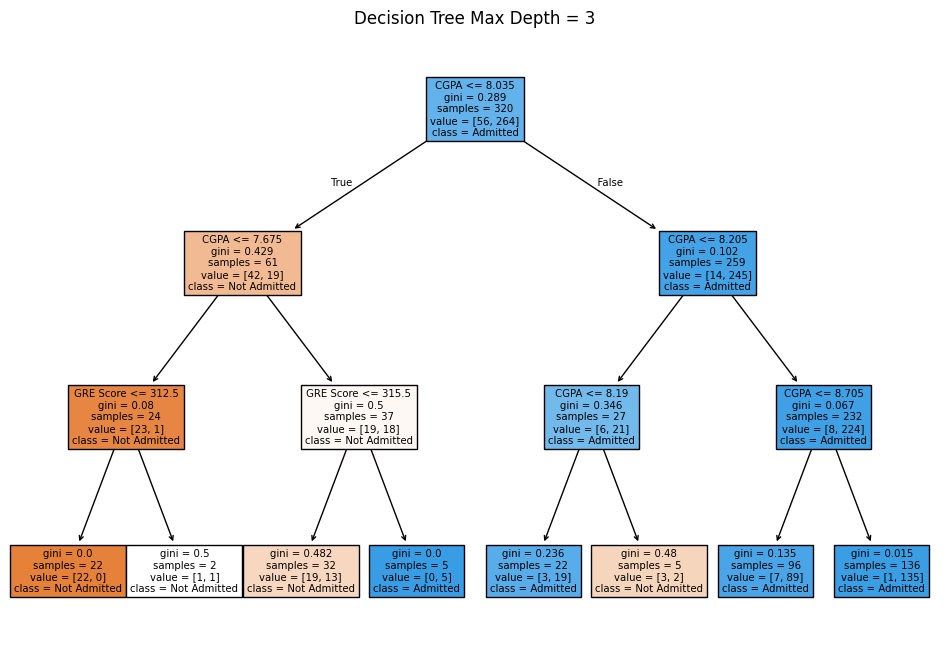

In [29]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()

In [30]:
print("Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Model Evaluation:
Accuracy: 0.875
Precision: 0.8955223880597015
Recall: 0.9523809523809523
F1 Score: 0.9230769230769231


In [31]:
print("Mean Square Error:  ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("R-Sqaure : ", metrics.r2_score(y_test,y_pred))

Mean Square Error:   0.125
Mean Absolute Error:  0.125
R-Sqaure :  0.2530345471521942
